In [65]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [55]:
def derivatives_v1(independ_variables, t, sigma, rho, beta):
    x, y, z = independ_variables
    d_dt = [0] * 3
    d_dt[0] = sigma * (y - x)
    d_dt[1] = x * (rho - z) - y
    d_dt[2] = x * y - beta * z
    return d_dt

In [100]:
sigma = 10.
rho = 28.
beta = 8. / 3

x0 = 0
y0 = [1., 1., 1.]
h = 0.01

t_v1 = np.arange(x0, 35, h)

sol_v1 = integrate.odeint(derivatives_v1, y0, t_v1, args=(sigma, rho, beta))

In [57]:
def derivatives_v2(t, independ_variables, sigma, rho, beta):
    x, y, z = independ_variables
    d_dt = [0] * 3
    d_dt[0] = sigma * (y - x)
    d_dt[1] = x * (rho - z) - y
    d_dt[2] = x * y - beta * z
    return d_dt

In [90]:
sigma = 10.
rho = 28.
beta = 8. / 3

x0 = 0
y0 = [1., 1., 1.]
t_v2 = [x0, 35]

sol_v2 = integrate.solve_ivp(derivatives_v2, t_v2, y0, method='RK45', args=(sigma, rho, beta)).y

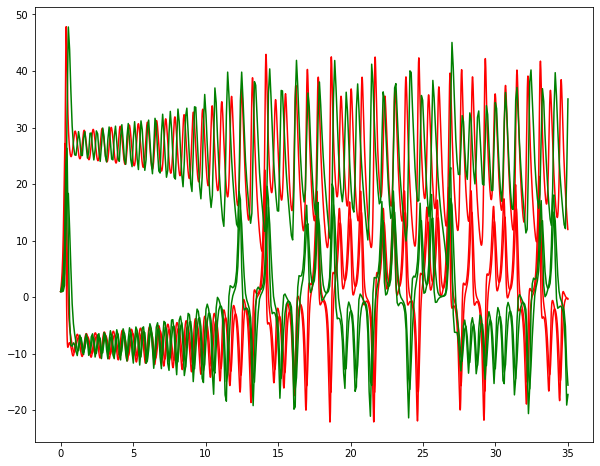

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# plot of scipy.integrate.odeint results
ax.plot(t_v1, sol_v1, color='r')

# plot of scipy.integrate.solve_ivp
ax.plot(np.linspace(t_v2[0], t_v2[1], len(sol_v2[0])), sol_v2[0], color='g')
ax.plot(np.linspace(t_v2[0], t_v2[1], len(sol_v2[1])), sol_v2[1], color='g')
ax.plot(np.linspace(t_v2[0], t_v2[1], len(sol_v2[2])), sol_v2[2], color='g')

### The graphs have similar characteristics but have very different values when 0$<$t 